# ⚠️ Anomaly Detection using Top 3 ML Methods

This notebook demonstrates how to detect anomalies using:

1. **Isolation Forest**
2. **One-Class SVM**
3. **Local Outlier Factor (LOF)**

We will use synthetic data with injected outliers and visualize how each method performs.


# Install the Packages


1.   scikit-learn
2.   matplotlib
3.   numpy



In [1]:
pip install scikit-learn matplotlib numpy

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

## 📊 Step 1: Generate Synthetic Data

- We'll create a cluster of normal data points using `make_blobs()`.
- Then, we'll add some uniformly random outliers to simulate anomalies.


In [8]:
X_normal, _ = make_blobs(n_samples=200, centers=1, cluster_std=0.60, random_state=42)
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X_normal, X_outliers])  # Combine normal data + outliers

## 🌲 Step 2: Apply Isolation Forest

Isolation Forest isolates anomalies by randomly splitting features. Anomalies get isolated quickly due to their uniqueness.


In [9]:
iso_model = IsolationForest(contamination=0.1, random_state=42)
iso_preds = iso_model.fit_predict(X)  # -1 = anomaly, 1 = normal

## 📉 Step 3: Apply One-Class SVM

One-Class SVM finds a boundary around normal data points. Anything outside the boundary is treated as an anomaly.


In [13]:
svm_model = OneClassSVM(kernel="rbf", nu=0.1, gamma="scale")
svm_model.fit(X)
svm_preds = svm_model.predict(X)  # -1 = anomaly, 1 = normal

## 🧭 Step 4: Apply Local Outlier Factor (LOF)

LOF detects outliers based on their local density compared to their neighbors.


In [12]:
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_preds = lof_model.fit_predict(X)  # -1 = anomaly, 1 = normal

## 🖼️ Step 5: Visualize Results

We’ll now plot the data and highlight detected anomalies (in red) and normal points (in green) for all three models.


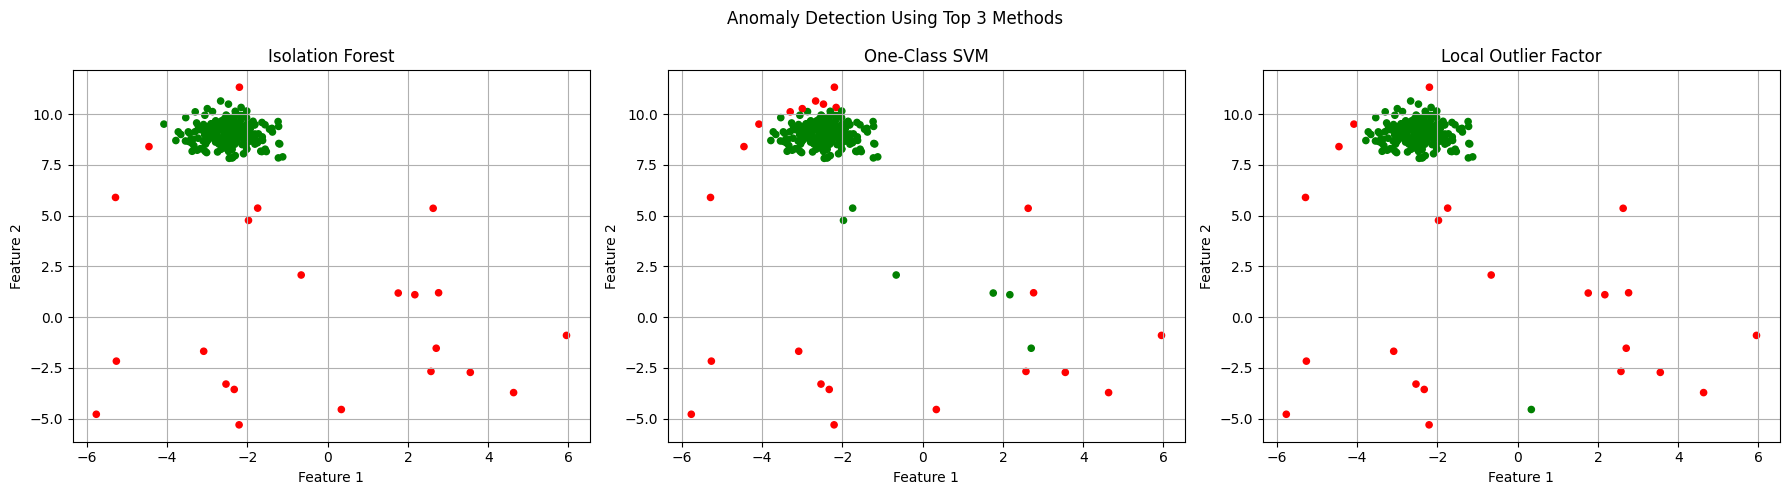

In [14]:
models = {
    "Isolation Forest": iso_preds,
    "One-Class SVM": svm_preds,
    "Local Outlier Factor": lof_preds
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, preds) in zip(axes, models.items()):
    ax.scatter(X[:, 0], X[:, 1], c=np.where(preds == -1, 'red', 'green'), s=20)
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.suptitle("Anomaly Detection Using Top 3 Methods")
plt.tight_layout()
plt.show()

# Demo Real Word Implementation of IsolationForest

The data is a collection of salaries, in USD per year, of different professionals. This data has few anomalies (like salary too high or too low) which we will be detecting. To get more of an idea of the data we have plotted data

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [19]:
df = pd.read_csv('/content/salary_data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


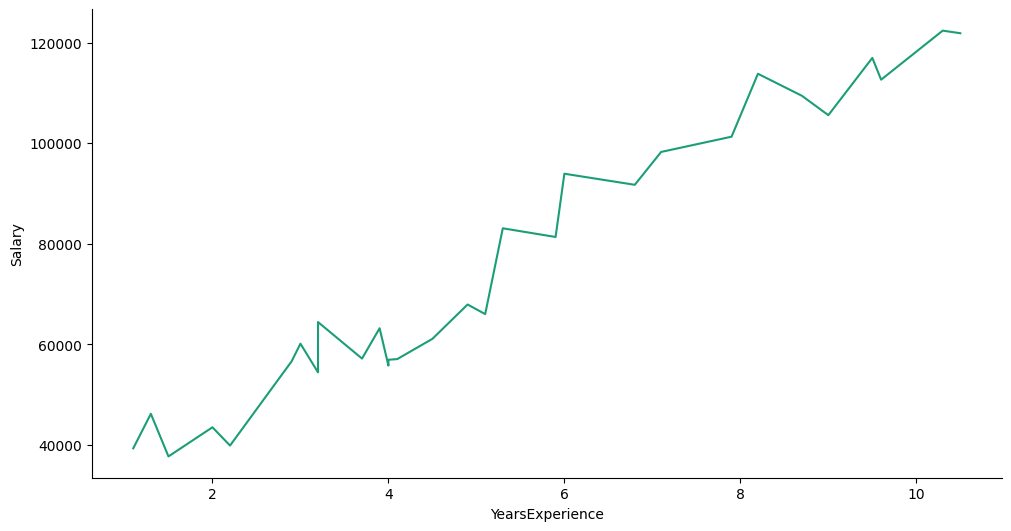

In [23]:
# @title YearsExperience vs Salary

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YearsExperience']
  ys = series['Salary']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('YearsExperience', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YearsExperience')
_ = plt.ylabel('Salary')

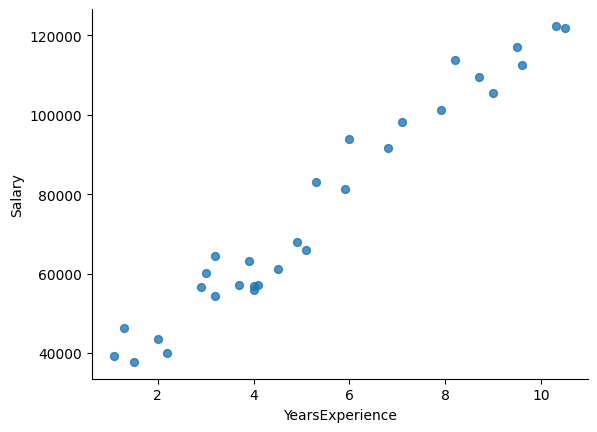

In [22]:
# @title YearsExperience vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

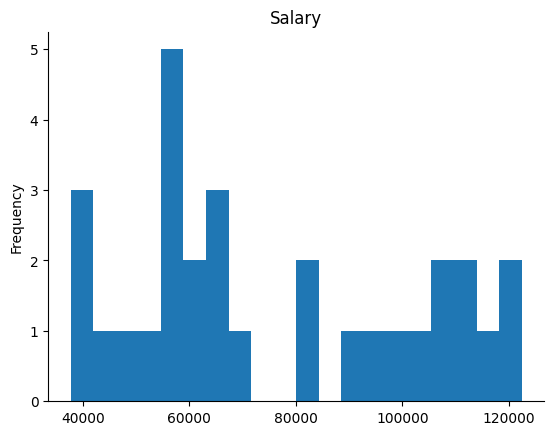

In [21]:
# @title Salary

from matplotlib import pyplot as plt
df['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

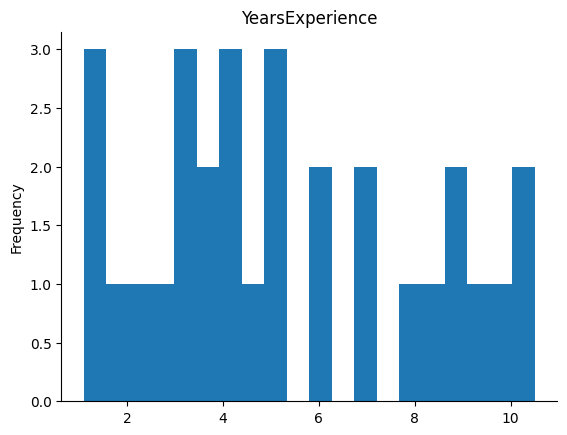

In [20]:
# @title YearsExperience

from matplotlib import pyplot as plt
df['YearsExperience'].plot(kind='hist', bins=20, title='YearsExperience')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['Salary']])

IsolationForest(contamination=0.1, n_estimators=50)

In [27]:
df['scores']=model.decision_function(df[['Salary']])
df['anomaly']=model.predict(df[['Salary']])
df.head(20)

,YearsExperience,Salary,scores,anomaly
0,1.1,39343.0,0.032504,1
1,1.3,46205.0,0.032478,1
2,1.5,37731.0,-0.052952,-1
3,2.0,43525.0,0.017876,1
4,2.2,39891.0,0.028947,1
5,2.9,56642.0,0.155467,1
6,3.0,60150.0,0.130733,1
7,3.2,54445.0,0.105127,1
8,3.2,64445.0,0.111155,1
9,3.7,57189.0,0.157770,1


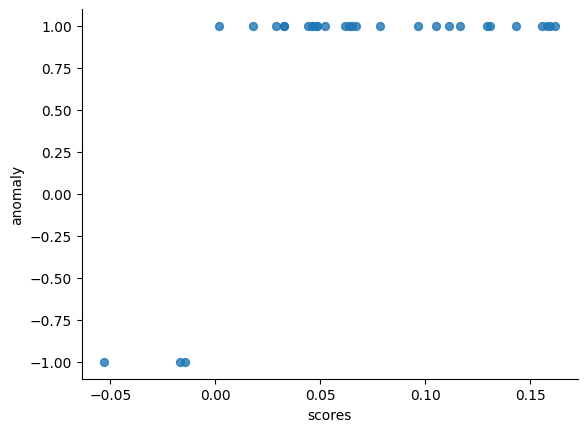

In [29]:
# @title scores vs anomaly

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='scores', y='anomaly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

    YearsExperience    Salary    scores  anomaly
2               1.5   37731.0 -0.052952       -1
28             10.3  122391.0 -0.017054       -1
29             10.5  121872.0 -0.014291       -1
